1\. **Hurricanes per Year**

The number of hurricanes in 2005 was 15. The historic average is 6.3. Is the 2005 number of hurricanes signficantly larger than the other years?
- Assume the number of hurricanes is random, i.e. follows the Poisson distribution.
- Assume as statistically significant a probability that has a Z score of 2 or larger with respect a normal distribution, or equivalently a level of significance of 0.022.

**Hint**: compute the probability that in a single year are observed 15 or more hurricances.

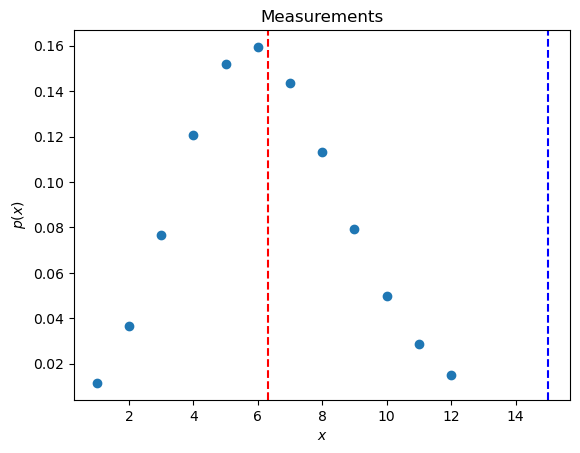

the z-score is:  3.4661629670697414


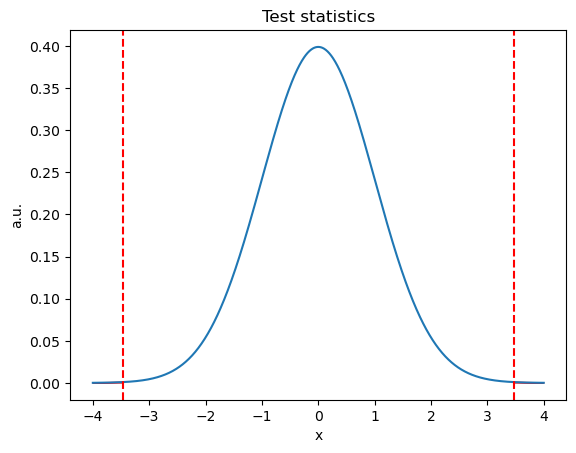

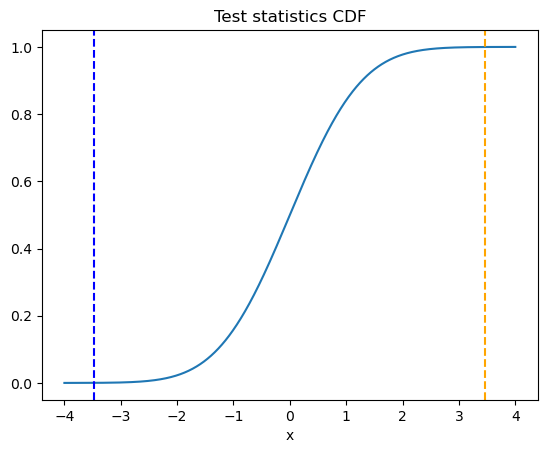

the p_value is:  0.0005279431738299246
The probability is less than the significance value (0.022), so we reject the null hypotehsis (2005 number of hurricanes are not signficantly larger than the other years)


In [6]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

mu = 6.3
x0 = 15
w = mu-x0

x = np.arange(stats.poisson.ppf(0.01, mu),
              stats.poisson.ppf(0.99, mu))

y = stats.poisson.pmf(x, mu)
plt.plot(x, y,'o')
plt.axvline(x0,linestyle = '--', color = 'blue')
plt.axvline(mu, linestyle = '--', color = 'red')
plt.title("Measurements")
plt.ylabel("$p(x)$")
plt.xlabel("$x$")
plt.show()


sigma = stats.poisson.std(mu)
Z = abs(x0-mu)/sigma
print("the z-score is: ", Z)

xs = np.linspace(-4,4,1000)
ts = stats.norm.pdf(xs)
plt.figure()
plt.plot(xs,ts)
plt.fill_between(xs,ts, where = np.abs(xs)>np.abs(Z), color = 'red')
plt.axvline(Z,linestyle = '--', color = 'red')
plt.axvline(-Z, linestyle = '--', color = 'red')
plt.title("Test statistics")
plt.ylabel("a.u.")
plt.xlabel("x")
plt.show()

# plot the Gaussian Comulative Distribution Function
cs = stats.norm.cdf(xs)
plt.figure()
plt.plot(xs, cs)
plt.axvline(Z, linestyle='--', color='orange')
plt.axvline(-Z, linestyle='--', color='blue')
plt.title("Test statistics CDF")
plt.xlabel("x")
plt.show()

p_value = stats.norm.cdf(-Z)+ (1- stats.norm.cdf(Z))
print('the p_value is: ', p_value)


print("The probability is less than the significance value (0.022), so we reject the null hypotehsis (2005 number of hurricanes are not signficantly larger than the other years)")



2\. **Pairwise t-test**

In an experiment, a group of 10 individuals agreed to participate in a study of blood pressure changes following exposure to halogen lighting. Resting systolic blood pressure was recorded for each individual. The participants were then exposed to 20 minutes in a room lit only by halogen lamps. A post-exposure systolic blood pressure reading was recorded for each individual. The results are presented in the following data set:

```python
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])
```

Determine whether the change in blood pressures within our sample was statistically significant.

**Hint:**
in this case, the Student's $t$-test should be performed to compare the two datasets.
Use the following test statistics:

$$T = \frac{\bar{x}_1 - \bar{x}_2}{\sigma \sqrt{\frac{2}{n}}}$$

and 

$$\sigma = \sqrt{\frac{\sigma_1^2 + \sigma_2^2}{2}}$$

T = -3.991846326292112


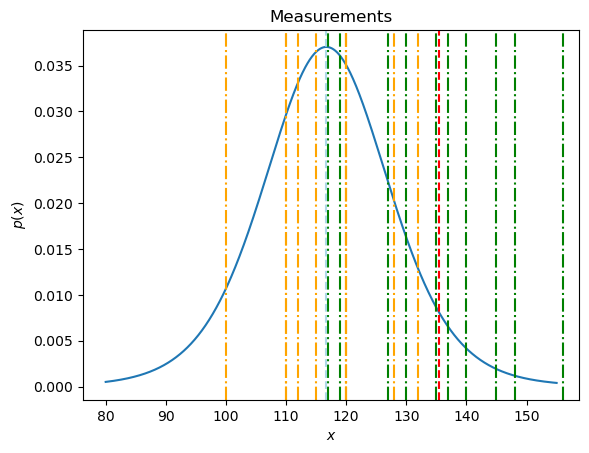

p-value = 0.0031489409354536393
There is no statistically significant change in blood pressures.


In [2]:
import math
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])

pre_m = np.mean(pre)
post_m = np.mean(post)

sigma_pre = np.std(pre)
sigma_post = np.std(post)

sigma = math.sqrt((sigma_pre**2 + sigma_post**2)/2)

n = len(post)

# calculate the T score with the test statistics
T = (pre_m - post_m) / (sigma *math.sqrt(2/(n)))
print("T =", T)


# set the input data
xbar = post_m # mean of the sample (which is different from mu)
mu = pre_m # the expected value for the mean
w = mu - xbar

# plot the measurents
x = np.linspace(80, 155, 1000)
y = stats.t.pdf(x, loc=mu, scale=sigma, df=len(pre) - 1)
plt.plot(x, y)
plt.axvline(xbar, linestyle='--', color='red')
for l_pre, l_post in zip(pre, post):
    plt.axvline(l_pre, linestyle='-.', color='orange')
    plt.axvline(l_post, linestyle='-.', color='green')
plt.axvline(mu, linestyle='--', color='lightblue')
plt.title("Measurements")
plt.ylabel("$p(x)$")
plt.xlabel("$x$")
plt.show()


pvalue = stats.t.cdf(T, len(pre) - 1) + (1. - stats.t.cdf(-T, len(pre) - 1))

print("p-value =", pvalue)



if abs(pvalue) > 0.05:
    print("The change in blood pressures is statistically significant.")
else:
    print("There is no statistically significant change in blood pressures.")


3\. **Curve fitting of temperature in Alaska** 

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  `17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18`

min: `-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58`

* Plot these temperatures.
* Find a suitable a function that can describe min and max temperatures. 
* Fit this function to the data with `scipy.optimize.curve_fit()`.
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

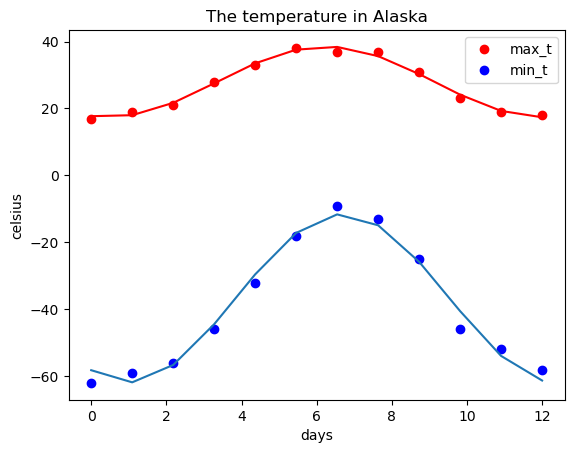

R2_max = 0.9882502430477917 
R_max = 0.9941077622912878
R2_min = 0.9787202745545963 
R_min = 0.9893029235550638
The high values of the correlation coefficients show that the fit is good.


In [3]:
from scipy import optimize
max_t = np.array([ 17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18])

min_t = np.array([ -62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58])

x = np.linspace(0,12,12)


def fit(t,A,T, phi, B):
    return A * np.sin(2 * np.pi / T * t + phi) +B

params_max,pcov = optimize.curve_fit(fit, x, max_t)
params_min,pcov = optimize.curve_fit(fit, x, min_t)


A_max, T_max, phi_max, B_max = params_max
A_mim, T_mim, phi_mim, B_mim = params_min


curve_max = fit(x,A_max, T_max, phi_max, B_max)
curve_min= fit(x,A_mim, T_mim, phi_mim, B_mim)

plt.plot(x, max_t, 'ro')
plt.plot(x, min_t,'bo')
plt.plot(x, curve_max, 'r-')
plt.plot(x, curve_min)
plt.legend(['max_t','min_t'] )
plt.title('The temperature in Alaska')
plt.xlabel('days')
plt.ylabel('celsius')
plt.show()

tempFit_max = fit(x, *params_max)
tempFit_min = fit(x, *params_min)

ssr_max = np.sum((max_t - curve_max)**2)
tss_max = np.sum((np.mean(max_t) - max_t)**2)

rsq_max = 1 - ssr_max / tss_max

ssr_min = np.sum((min_t - curve_min)**2)
tss_min = np.sum((np.mean(min_t) - min_t)**2)

rsq_min = 1 - ssr_min / tss_min

print("R2_max =", rsq_max, "\nR_max =", np.sqrt(rsq_max))
print("R2_min =", rsq_min, "\nR_min =", np.sqrt(rsq_min))
print("The high values of the correlation coefficients show that the fit is good.")


4\. **Fit the residues**

Read the `data/residuals_261.pkl` file. If you haven't got it already, download it from here:

```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```

The feature named `residual` contains the residuals (defined as $y_i - \hat{y}_i$) of a linear regression as a function of the independent variable `distances`.

- Considering only the "residual" feature, create an histogram with the appropriate binning and plot it.
- Set the appropriate Poisson uncertainty for each bin (thus, for each bin, $\sigma_i = \sqrt{n_i}$, where $n_i$ is the number of entries in each bin)
- By looking at the distribution of the residuals, define an appropriate function and fit it to the histogram of the residuals
- Perform the $\chi^2$ goodness-of-fit test. What is the p-value of the fit? Is the fit function appropriate to describe the data?


 Statistics of the residuals
 - Max value : 11.320
 - Min value : -160.850
 - Average : -0.616
 - Standard Deviation : 4.164


C:\Users\Gasba Family\AppData\Local\Temp\ipykernel_9480\1290015552.py:47: RuntimeWarning: divide by zero encountered in divide
  poisson_errors = 1/(hist ** 0.5)


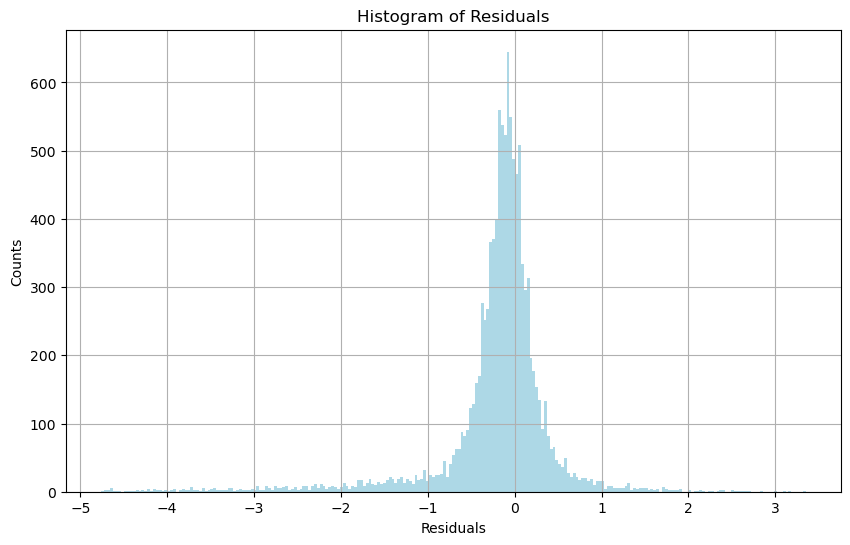

n degrees of freedom = 220
chi2 = 180.5307582491649


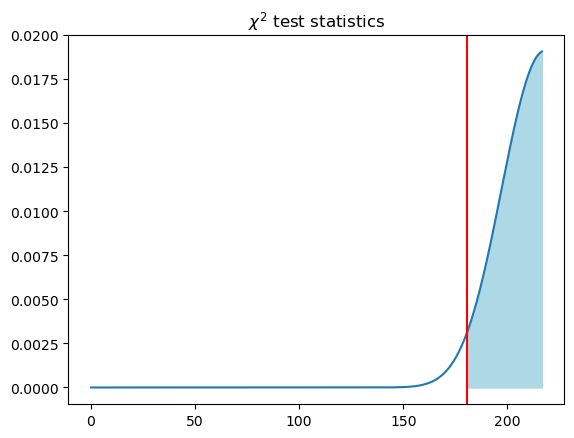

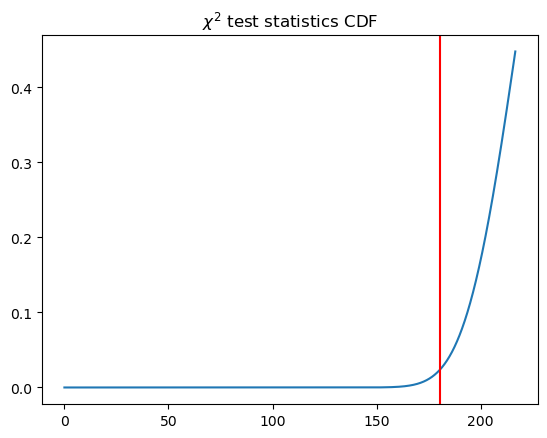

p-value = 0.9758848294209406
The Laplacian fit is appropriate to describe the data.


In [4]:

# Define Laplacian distribution function
def laplace_distr(x, m, s, a):
    return stats.laplace.pdf(x, m, s) * a

def chi2HistogramFitTest(histo, histofit):
    ndof = len(histo) - 1
    
    print("n degrees of freedom =", ndof)
    
    sigma2 = histo
    chi2 = np.sum((histo - histofit) ** 2 / sigma2)
    chi2 /= 5
    print("chi2 =", chi2)
    
    p = np.arange(0, 1.2 * chi2, 0.1)
    ts = stats.chi2.pdf(p, df=ndof)
    plt.plot(p, ts)
    plt.title("$\chi^2$ test statistics")
    plt.axvline(chi2, color='red')
    plt.fill_between(p, ts, where=(p > chi2), color='lightblue')
    plt.show()
    plt.plot(p, stats.chi2.cdf(p, df=ndof))

    plt.title("$\chi^2$ test statistics CDF")
    plt.axvline(chi2, color='r')
    plt.show()

    # calculate the p-value from the chi^2, the n.d.o.f., and the cumulative chi^2 distribution
    pvalue = 1. - stats.chi2.cdf(chi2, ndof)
    print("p-value =", pvalue) # if the p-value is < 0.05, the fit is considered unsatisfactory
    
    return pvalue


# Function for plotting histogram with additional options
def get_histogram(data, bins='auto', title:str=None, hold_plot=False, plot_Poisson_err=False):
    # input check
    #assert bins in ['auto', 'fd', 'doane', 'scott', 'stone', 'rice', 'sturges', 'sqrt'] or type(bins)==int or type(bins)==np.ndarray
    plt.figure(figsize=(10,6))
    hist, bins, _ = plt.hist(data, bins=bins, color='lightblue')
    plt.title(title)
    plt.ylabel("Counts")
    plt.xlabel("Residuals")
    plt.ylim(0)
    plt.grid()
    # plot Poisson errorbars
    poisson_errors = 1/(hist ** 0.5)
    if plot_Poisson_err:
        bin_centers = bins[:-1] + np.diff(bins)/2
        plt.errorbar(bin_centers, hist, yerr=poisson_errors, fmt='.', c='k', ecolor='r')
    if not hold_plot:
        plt.show()
    
    return hist, bins, poisson_errors


# Read the data from the pickle file
file_path = "residuals_261.pkl"

# Extract the "residual" feature
data = np.load(file_path, allow_pickle=True).reshape(-1)[0]
residuals = data['residuals']


print("\n Statistics of the residuals")
print(" - Max value : %0.3f" % max(residuals))
print(" - Min value : %0.3f" % min(residuals))
print(" - Average : %0.3f" % np.mean(residuals))
print(" - Standard Deviation : %0.3f" % np.std(residuals))

# Get the counts of the residuals having value in the specified range
threshold_val = np.std(residuals)
residuals_mean = np.mean(residuals)
ranged_residuals = residuals[residuals <= residuals_mean + threshold_val]
ranged_residuals = ranged_residuals[ranged_residuals >= residuals_mean - threshold_val]

# Plot the unique residuals counts considering only the restricted range
ranged_uniques, ranged_counts = np.unique(ranged_residuals, return_counts=True)
bin_method='fd' #Freedman-Diaconis 
hist, bins, poisson_errors = get_histogram(ranged_residuals, 
                                           bins=bin_method, 
                                           title='Histogram of Residuals',
                                           plot_Poisson_err=False
                                           )







# Mask histogram bins withzero count
mask = hist > 0
hist = hist[mask]

# Get centers of the bins
bin_centers = bins[:-1] + np.diff(bins)/2
bin_centers = bin_centers[mask]
# Fit the Laplacian function to the histogram
popt, pcov = optimize.curve_fit(laplace_distr, xdata=bin_centers, ydata=hist)
m_opt_laplace, s_opt_laplace, a_opt_laplace = popt


histofit_laplace = laplace_distr(bin_centers, m_opt_laplace, s_opt_laplace, a_opt_laplace)
p_val_fitlaplace = chi2HistogramFitTest(hist, histofit_laplace)




# Check the p-value and determine if the Laplacian fit is appropriate
if p_val_fitlaplace< 0.05:
    print("The Laplacian fit is not appropriate to describe the data.")
else:
    print("The Laplacian fit is appropriate to describe the data.")

5\. **Temperatures in Munich**

Get the following data file:

```bash
https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
```

which gives the temperature in Munich every day for several years.


Fit the following function to the data:

$$f(t) = a \cos(2\pi t + b)+c$$

where $t$ is the time in years.

- Make a plot of the data and the best-fit model in the range 2008 to 2012.

   - What are the best-fit values of the parameters and thier uncertainties?

   - What is the overall average temperature in Munich, and what are the typical daily average values predicted by the model for the coldest and hottest time of year?

   - What is the meaning of the $b$ parameter, and what physical sense does it have? Describe it with a comment in the code.


- **Optional:** Now fit the data with the function $g(x)$, which has 1 more parameter than $f(x)$.
$$g(x) = a \cos(2\pi b t + c)+d$$
   - What are the RSS for $f(x)$ and $g(x)$?
   - Use the Fisher F-test to determine whether the additional parameter is motivated.

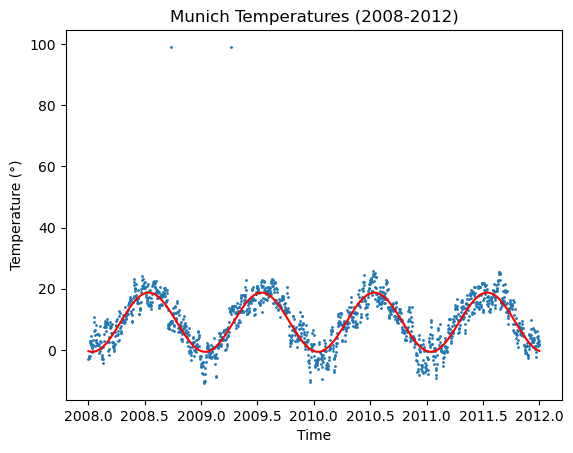


Best-fit values of the parameters

	 a = -9.67161388265641 +-  0.031079844354173422

	 b = 0.9997396590637475 +-  3.045207919125523e-07

	 c = 15.621256720834678 +-  48.28828103993705

	 d = 9.051352256987123 +-  0.01558343305350888 


Overall average temperature in Munich : 8.94 


Daily average value predicted by the model

	 Hottest time of the year : 18.72°

	 Coldest time of the year : -0.62°


In [5]:
import pandas as pd
def F(t,a,b,c,d):
    return a*np.cos(2*np.pi*b*t + c) + d

data = np.loadtxt('data/munich_temperatures_average_with_bad_data.txt')
temp = data[:,1]
x = data[:,0]



param, cov = optimize.curve_fit(F,x, temp)
fit = F(x,param[0],param[1],param[2],param[3])


# Plot data and fit from 2008 to 2012
ranged_data_mask = np.bitwise_and(x >= 2008., x <= 2012.)
ranged_time = x[ranged_data_mask]
ranged_temperatures = temp[ranged_data_mask]
ranged_data_fit =fit[ranged_data_mask]

plt.figure()
plt.scatter(ranged_time,ranged_temperatures, s = 1)
plt.plot(ranged_time,ranged_data_fit, 'r')
plt.title("Munich Temperatures (2008-2012)")
plt.ylabel("Temperature (°)")
plt.xlabel("Time")
plt.show()

print(f"\nBest-fit values of the parameters")
print("\n\t a =", param[0], '+- ', cov[0,0])
print("\n\t b =", param[1], '+- ' ,cov[1,1])
print("\n\t c =", param[2], '+- ', cov[2,2] )
print("\n\t d =", param[3], '+- ' ,cov[3,3], "\n")



#What is the overall average temperature in Munich, and what are the typical daily average 
#values predicted by the model for the coldest and hottest time of year?

temp_mean= np.mean(temp)

print("\nOverall average temperature in Munich : %0.2f" % temp_mean, "\n")

temp_max = np.max(fit)
temp_min = np.min(fit)


print(f"\nDaily average value predicted by the model")
print("\n\t Hottest time of the year : %0.2f°" % temp_max)
print("\n\t Coldest time of the year : %0.2f°" % temp_min)



#The phase shift parameter b determines how much the cosine function is shifted to the left or right along the time axis. 
#A positive b value shifts the curve to the left, 
#and a negative b value shifts it to the right.
#By adjusting the b parameter, you can control the alignment of the cosine curve with respect to the time axis,
#allowing you to match the data more accurately. 